In [1]:
import numpy as np
import math as mp
import pandas as pd

In [2]:
sigma = 5
beta = 1 /( 1.0 +0.01)
beta1 =1/( (1.0 +0.01* np.exp(30/(36.5*0.9)))) 
W = 1

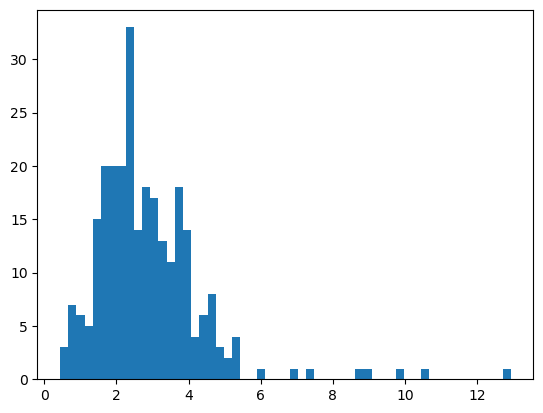

In [3]:
data=pd.read_csv('APP_data_usa_goods.csv', index_col=0, parse_dates=True, infer_datetime_format=True)
data_tau=(data['invtCogsRatio']* 36.5/(30*0.1))
import matplotlib.pyplot as plt
plt.hist(data_tau,bins = 55)
plt.show()




In [4]:
tau_diff = np.zeros(( 1000,1))
i = 0
for c in np.linspace(0, 0.99, 1000): 
    N = -(data_tau) - 1/np.log(beta*c) 
    tau1= -1/np.log(beta*c) - N
    tau1[tau1<0] = 0     
    tau2= -1/np.log(beta1*c) - N
    tau2[tau2<0] = 0    
    tau_diff[i] = np.mean(np.abs(tau1-tau2))
    i = i+1

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2652/1678760125.py:4: RuntimeWarning: divide by zero encountered in log
  N = -(data_tau) - 1/np.log(beta*c)
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2652/1678760125.py:5: RuntimeWarning: divide by zero encountered in log
  tau1= -1/np.log(beta*c) - N
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_2652/1678760125.py:7: RuntimeWarning: divide by zero encountered in log
  tau2= -1/np.log(beta1*c) - N


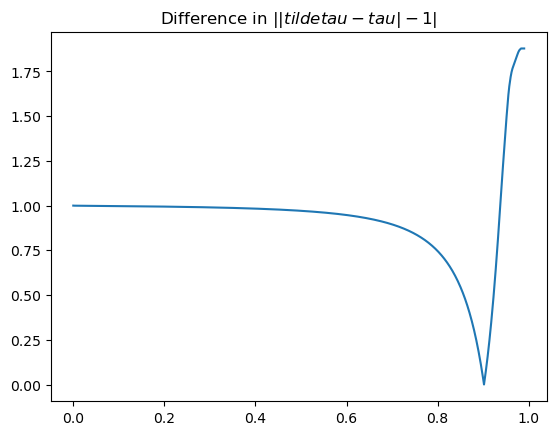

In [5]:
plt.plot(np.linspace(0, 0.99, 1000),np.abs(tau_diff-1))
plt.title('Difference in $||tildetau - tau| -1|$')

plt.show()

In [6]:
min_val = np.min(np.abs(tau_diff-1))
argmins = np.where(np.abs(tau_diff-1) == min_val)[0]

In [7]:
c_list = np.linspace(0, 0.99, 1000)
c=c_list[argmins]


In [8]:
c

array([0.9018018])

In [9]:
min_val*30*24*60

8.123445802343099

In [10]:
beta*c

array([0.89287307])

In [11]:
N=-data_tau - 1/np.log(beta*c) 
tau= -1/np.log(beta*c) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  (beta*c)**tau_ceil * (tau_ceil + N)
tprod_floor=  (beta*c)**tau_floor * (tau_floor + N)

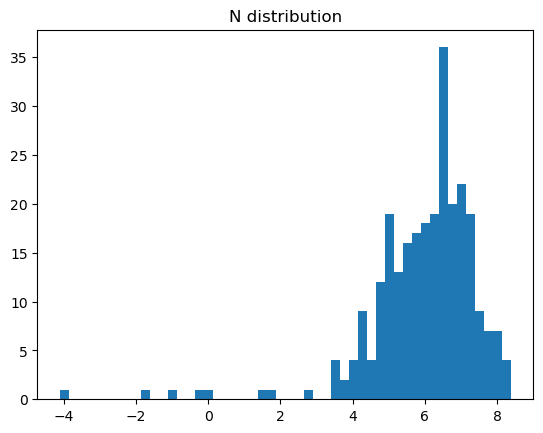

In [12]:
plt.hist(N, bins=50)
plt.title('N distribution')
plt.show()


In [13]:
tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
tau[tau<0] = 0  
tprod = (beta*c)**tau * (tau + N)

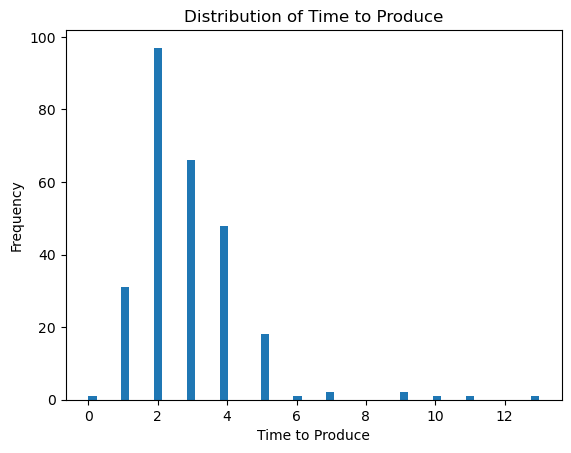

In [14]:
plt.hist(tau, bins = 55, alpha=1, label='tau_noise')
plt.xlabel('Time to Produce')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Produce')
plt.show()

In [15]:
tau = np.array(tau, dtype=int)

In [16]:

def generate_pattern_array_with_extra_rows(tau):
    # 1) Create the original n×n pattern
    n = len(tau)+ int(np.min(tau))
    m = int(np.max(tau)) + int(np.min(tau))

    mx = int(max(tau))
    missing_count = len(set(range(int(max(tau) )+ 1)) - set(tau))


    A = np.ones((m+2, n+missing_count), dtype=float)
    count = 0
    for i in range(1, m+2):
        for j in range(len(tau[tau == i-1])):
            A[i, n- i-j - count] = 0.99  # 0.9 shifts diagonally from right to left as we go down
        if len(tau[tau == i-1]) > 1:
            count += len(tau[tau == i-1])-1
    # 2) Create the two extra rows:
    #    (a) one row with 0.9 at the leftmost column,
    #    (b) one row of all ones.

    row_all_ones = np.ones(n+missing_count, dtype=float)
    A_extended = np.vstack([A,row_all_ones])
    A_extended = A_extended[:,0:n - int(np.min(tau))]

    return A_extended

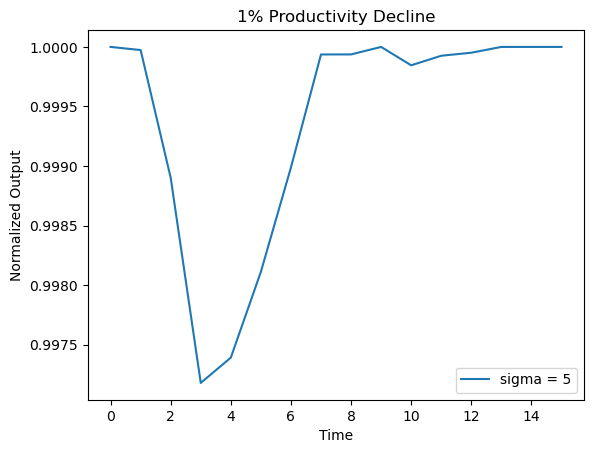

In [17]:
import matplotlib.pyplot as plt
for sigma in [5]:
    tau1= -1/np.log(beta*c) - N
    tau1[tau1<0] = 0  
    tau1_floor = np.floor(tau1)
    tau1_ceil = np.ceil(tau1)
    tprod1_ceil=  (beta*c)**tau1_ceil * (tau1_ceil + N)
    tprod1_floor=  (beta*c)**tau1_floor * (tau1_floor + N)

    tau1[(tprod1_ceil-tprod1_floor)>0] = tau1_ceil[(tprod1_ceil-tprod1_floor)>0]
    tau1[(tprod1_ceil-tprod1_floor)<0] = tau1_floor[(tprod1_ceil-tprod1_floor)<0]
    tau1[tau1<0] = 0  
    tprod1 = (beta*c)**tau1 * (tau1 + N)


    tau1 = tau1[::-1]

    tprod1=  np.array((beta*c)**tau1 * (tau1 + N) )  
    A= generate_pattern_array_with_extra_rows(tau1)
    P0 = (np.sum(1/(A*tprod1)**(1-sigma),axis =1))**(1/(1-sigma))
    plt.plot( (1/P0)*P0[0], label='sigma = {}'.format(sigma))
plt.title('1% Productivity Decline')
plt.xlabel('Time')
plt.ylabel('Normalized Output')
plt.legend()
plt.show()

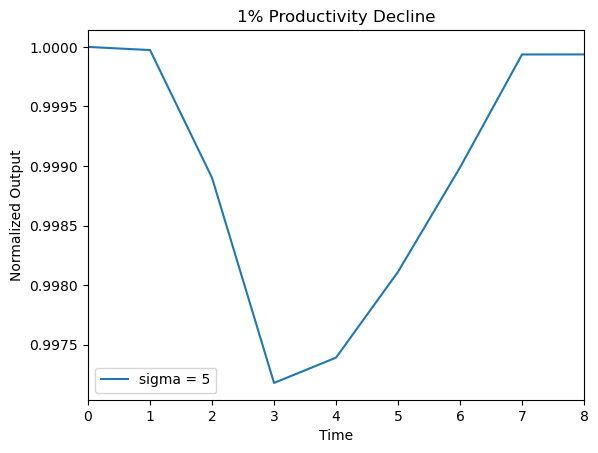

In [18]:
import matplotlib.pyplot as plt
for sigma in [5]:
    tau1= -1/np.log(beta*c) - N
    tau1[tau1<0] = 0  
    tau1_floor = np.floor(tau1)
    tau1_ceil = np.ceil(tau1)
    tprod1_ceil=  (beta*c)**tau1_ceil * (tau1_ceil + N)
    tprod1_floor=  (beta*c)**tau1_floor * (tau1_floor + N)

    tau1[(tprod1_ceil-tprod1_floor)>0] = tau1_ceil[(tprod1_ceil-tprod1_floor)>0]
    tau1[(tprod1_ceil-tprod1_floor)<0] = tau1_floor[(tprod1_ceil-tprod1_floor)<0]
    tau1[tau1<0] = 0  
    tprod1 = (beta*c)**tau1 * (tau1 + N)


    tau1 = tau1[::-1]

    tprod1=  np.array((beta*c)**tau1 * (tau1 + N) )  
    A= generate_pattern_array_with_extra_rows(tau1)
    P0 = (np.sum(1/(A*tprod1)**(1-sigma),axis =1))**(1/(1-sigma))
    plt.plot( (1/P0)*P0[0], label='sigma = {}'.format(sigma))
plt.title('1% Productivity Decline')
plt.xlabel('Time')
plt.ylabel('Normalized Output')
plt.xlim(0, 8)
plt.legend()
plt.show()

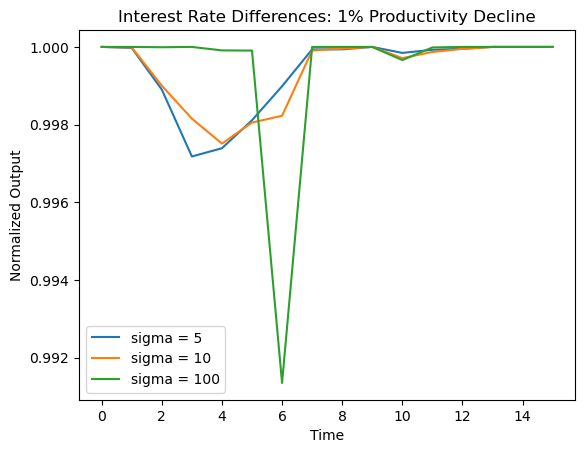

In [27]:
import matplotlib.pyplot as plt
for sigma in [5,10,100]:
    beta = (1 / (1 + 0.01))*c
    tau= -1/np.log(beta) - N
    tau[tau<0] = 0  
    tau_floor = np.floor(tau)
    tau_ceil = np.ceil(tau) 
    tprod_ceil=  beta**tau_ceil * (tau_ceil + N)
    tprod_floor=  beta**tau_floor * (tau_floor + N)
    tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
    tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
    tau[tau<0] = 0  
    tau = tau[::-1]

    tprod1=  np.array(beta**tau * (tau + N) )  
    A= generate_pattern_array_with_extra_rows(tau)
    P0 = (np.sum(1/(A*tprod1)**(1-sigma),axis =1))**(1/(1-sigma))
    plt.plot( (1/P0)*P0[0], label='sigma = {}'.format(sigma))

plt.title('Interest Rate Differences: 1% Productivity Decline')
plt.xlabel('Time')
plt.ylabel('Normalized Output')

plt.legend()
plt.show()

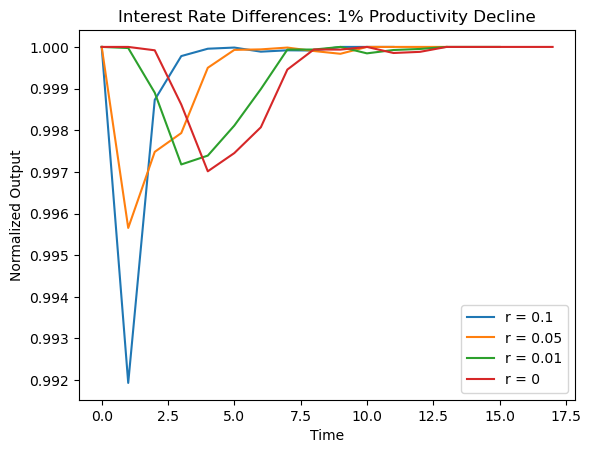

In [19]:
import matplotlib.pyplot as plt
taus = {}

for r in [0.1,0.05,0.01,0]:
    beta = (1 / (1 + r))*c
    tau= -1/np.log(beta) - N
    tau[tau<0] = 0  
    tau_floor = np.floor(tau)
    tau_ceil = np.ceil(tau) 
    tprod_ceil=  beta**tau_ceil * (tau_ceil + N)
    tprod_floor=  beta**tau_floor * (tau_floor + N)
    tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
    tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
    tau[tau<0] = 0  
    tau = tau[::-1]
    taus[r] = tau

    tprod1=  np.array(beta**tau * (tau + N) )  
    A= generate_pattern_array_with_extra_rows(tau)
    P0 = (np.sum(1/(A*tprod1)**(1-sigma),axis =1))**(1/(1-sigma))
    plt.plot( (1/P0)*P0[0], label='r = {}'.format(r))

plt.title('Interest Rate Differences: 1% Productivity Decline')
plt.xlabel('Time')
plt.ylabel('Normalized Output')

plt.legend()
plt.show()

In [22]:
N=-data_tau - 1/np.log(beta*c) 
tau= -1/np.log(beta*c) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  (beta*c)**tau_ceil * (tau_ceil + N)
tprod_floor=  (beta*c)**tau_floor * (tau_floor + N)

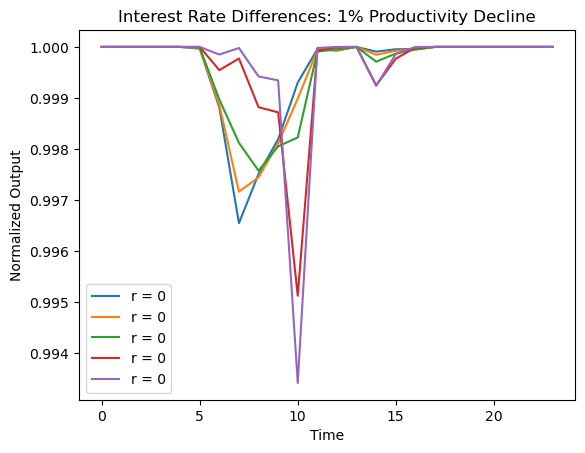

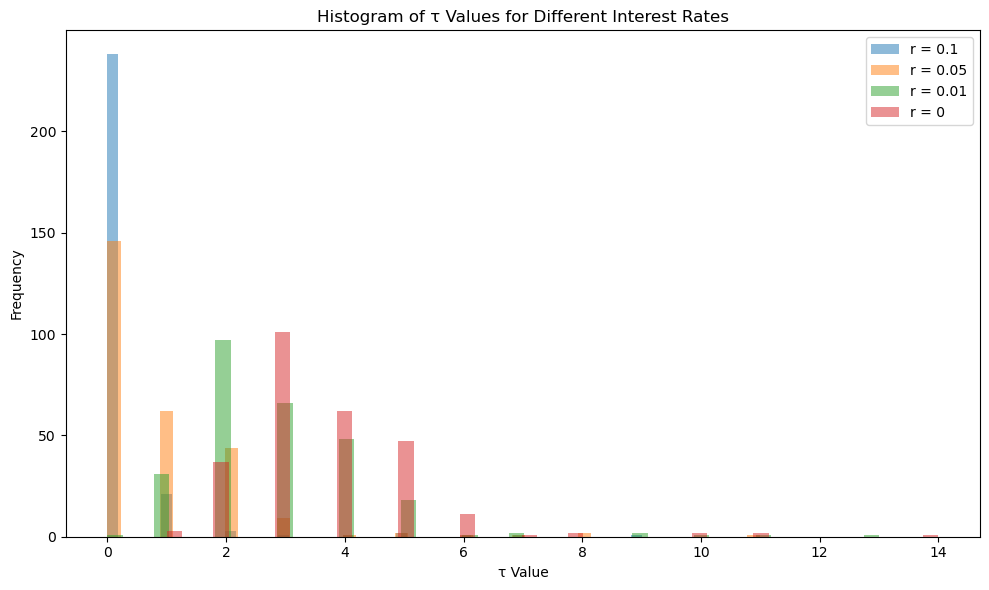

In [63]:
import matplotlib.pyplot as plt

# Plot histograms of tau values for each interest rate
plt.figure(figsize=(10, 6))

for r, tau_values in taus.items():
    plt.hist(tau_values, bins=50, alpha=0.5, label=f'r = {r}')

plt.title('Histogram of τ Values for Different Interest Rates')
plt.xlabel('τ Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [64]:
r_arrange = np.linspace(0, 0.1, 1000)
deviation_gap = np.zeros((1000,1))
gap = 0
fed_discount_rate = 0.99
for r in r_arrange:
    beta = (1 / (1 + r))*c
    tau= -1/np.log(beta) - N
    tau[tau<0] = 0  
    tau_floor = np.floor(tau)
    tau_ceil = np.ceil(tau)
    tprod_ceil=  beta**tau_ceil * (tau_ceil + N)
    tprod_floor=  beta**tau_floor * (tau_floor + N)
    tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
    tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
    tau[tau<0] = 0  
    tau = tau[::-1]
    taus[r] = tau

    tprod1=  np.array(beta**tau * (tau + N) )  
    A= generate_pattern_array_with_extra_rows(tau)
    P0 = (np.sum(1/(A*tprod1)**(1-sigma),axis =1))**(1/(1-sigma))

    deviation_gap[gap] = np.sum( fed_discount_rate**np.linspace(0, len(P0)-1, int(len(P0))) * ((1/P0)*P0[0]-1)**2)
    gap = gap+1

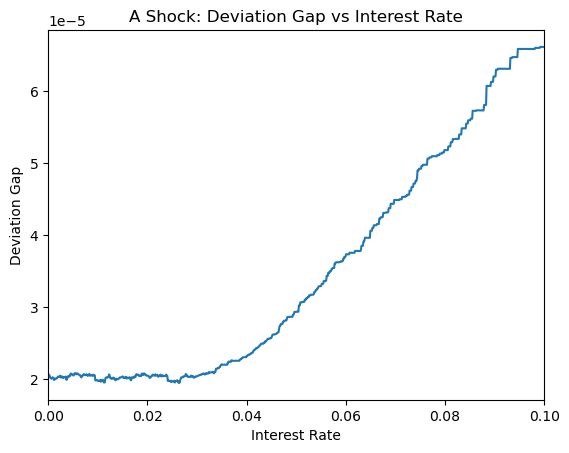

In [65]:
plt.plot(r_arrange, deviation_gap)
plt.title('A Shock: Deviation Gap vs Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Deviation Gap')
plt.xlim(0, 0.1)
plt.show()

In [66]:
argmins_gap = np.where(deviation_gap == np.min(deviation_gap))[0]

In [67]:
r_arrange[argmins_gap]

array([0.02632633])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


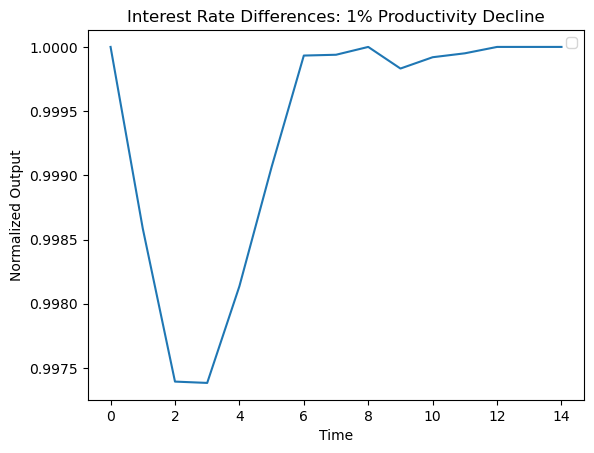

In [68]:
beta = (1 / (1 + r_arrange[argmins_gap]))*c
tau= -1/np.log(beta) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  beta**tau_ceil * (tau_ceil + N)
tprod_floor=  beta**tau_floor * (tau_floor + N)
tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
tau[tau<0] = 0  
tau = tau[::-1]
taus[r] = tau

tprod1=  np.array(beta**tau * (tau + N) )  
A= generate_pattern_array_with_extra_rows(tau)
P0 = (np.sum(1/(A*tprod1)**(1-sigma),axis =1))**(1/(1-sigma))
plt.plot( (1/P0)*P0[0])

plt.title('Interest Rate Differences: 1% Productivity Decline')
plt.xlabel('Time')
plt.ylabel('Normalized Output')

plt.legend()
plt.show()

In [69]:
beta = 1 / (1+0.01) *c
N=-data_tau - 1/np.log(beta) 

In [70]:

tau1= -1/np.log(beta) - N
tau1[tau1<0] = 0  
tau1_ceil = np.ceil(tau1)
tau1_floor = np.floor(tau1)
tprod1_ceil=  beta**tau1_ceil * (tau1_ceil + N)
tprod1_floor=  beta**tau1_floor * (tau1_floor + N)

In [71]:
tau1[(tprod1_ceil-tprod1_floor)>0] = tau1_ceil[(tprod1_ceil-tprod1_floor)>0]
tau1[(tprod1_ceil-tprod1_floor)<0] = tau1_floor[(tprod1_ceil-tprod1_floor)<0]
tau1[tau1<0] = 0  
tprod1 = beta**tau1 * (tau1 + N)

In [72]:
N1 =  N*0.98
tau2= -1/np.log(beta) - N1
tau2[tau2<0] = 0  
tau2_ceil = np.ceil(tau2)
tau2_floor = np.floor(tau2)
tprod2_ceil=  beta**tau2_ceil * (tau2_ceil + N1)
tprod2_floor=  beta**tau2_floor * (tau2_floor + N1)

In [73]:
tau2[(tprod2_ceil-tprod2_floor)>0] = tau2_ceil[(tprod2_ceil-tprod2_floor)>0]
tau2[(tprod2_ceil-tprod2_floor)<0] = tau2_floor[(tprod2_ceil-tprod2_floor)<0]
tau2[tau2<0] = 0
t_prod2 = beta**tau2 * (tau2 + N1)**1

In [74]:
tau1 = tau1.sort_values()
tau2 = tau2.sort_values()

In [75]:
diff = tau1-tau2

In [76]:
index_diff=tau2[diff !=0].index

In [77]:
matches = tau2.index.isin(index_diff)

In [78]:
P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma))
P = np.zeros((int(np.max(tau2))+2, 1))
P[0,0] = P0 
P[-1,0] = P0
for j in range(0, int(np.max(tau2))): 
    tau1_temp = tau1[tau1 != j]
    tau2_temp = tau2[tau2 == j]
    N_temp1 = N[tau1 != j]
    N_temp2 = N1[tau2 == j]        
    N_temp = np.concatenate([N_temp1, N_temp2])
    tau_temp = np.concatenate([tau1_temp,tau2_temp])
    matches = tau2_temp.index.isin(index_diff)

    if matches.any():
        print(tau2_temp[matches])
        tau2_temp=tau2_temp[~matches]
        N_temp2 = N_temp2[~matches]
        N_temp = np.concatenate([N_temp1, N_temp2])
        tau_temp = np.concatenate([tau1_temp,tau2_temp])
    tprod_temp = beta**tau_temp * (tau_temp + N_temp)
    P[j+1,0] = (np.sum(1/(tprod_temp)**(1-sigma)))**(1/(1-sigma))

naics6
221310    1.0
Name: invtCogsRatio, dtype: float64
naics6
327993    2.0
323117    2.0
327320    2.0
336415    2.0
327420    2.0
311520    2.0
337214    2.0
221115    2.0
336350    2.0
327992    2.0
325613    2.0
Name: invtCogsRatio, dtype: float64
naics6
325510    3.0
322212    3.0
325520    3.0
325211    3.0
332420    3.0
337215    3.0
334511    3.0
325110    3.0
331313    3.0
336612    3.0
333318    3.0
326211    3.0
334112    3.0
333618    3.0
Name: invtCogsRatio, dtype: float64
naics6
337127    4.0
339910    4.0
332510    4.0
311942    4.0
316210    4.0
Name: invtCogsRatio, dtype: float64
naics6
339114    5.0
331491    5.0
333517    5.0
Name: invtCogsRatio, dtype: float64


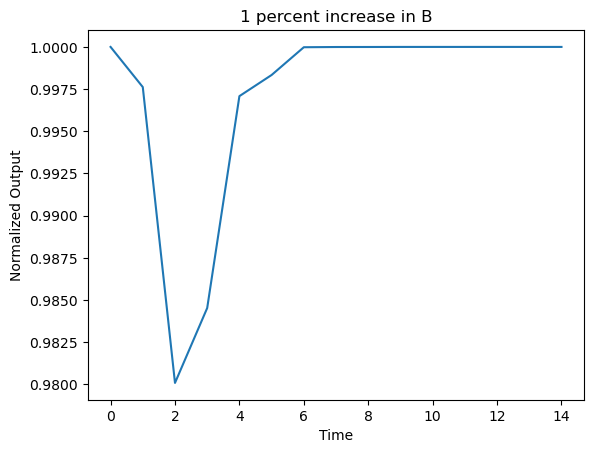

In [79]:
import matplotlib.pyplot as plt

plt.plot( (1/ P)* P[0])
plt.title('1 percent increase in B')
plt.xlabel('Time')
plt.ylabel('Normalized Output') 
plt.show()

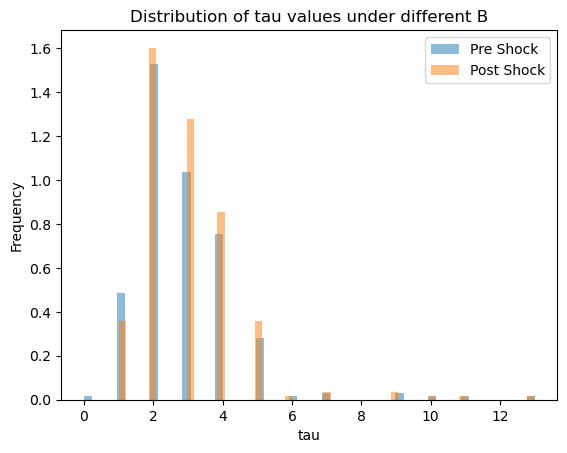

In [80]:
plt.hist(tau1, bins=55,density=True ,alpha=0.5, label='Pre Shock')
plt.hist(tau2, bins=55,density=True ,alpha=0.5, label='Post Shock')
plt.title('Distribution of tau values under different B')
plt.xlabel('tau')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [81]:
gap =0
r_arrange = np.linspace(0, 1, 1000)
P = np.zeros((int(np.max(tau2))+2, len(r_arrange)))
tau_history = {}
tau_history_org = {}
k=0
for r in r_arrange:
    beta = 1 / (1+r) *c
    N=-data_tau - 1/np.log(beta) 

    tau1= -1/np.log(beta) - N
    tau1[tau1<0] = 0  
    tau1_ceil = np.ceil(tau1)
    tau1_floor = np.floor(tau1)
    tprod1_ceil=  beta**tau1_ceil * (tau1_ceil + N)
    tprod1_floor=  beta**tau1_floor * (tau1_floor + N)
    tau1[(tprod1_ceil-tprod1_floor)>0] = tau1_ceil[(tprod1_ceil-tprod1_floor)>0]
    tau1[(tprod1_ceil-tprod1_floor)<0] = tau1_floor[(tprod1_ceil-tprod1_floor)<0]
    tau1[tau1<0] = 0  
    tprod1 = beta**tau1 * (tau1 + N)

    N1 =  N*0.99
    tau2= -1/np.log(beta) - N1
    tau2[tau2<0] = 0  
    tau2_ceil = np.ceil(tau2)
    tau2_floor = np.floor(tau2)
    tprod2_ceil=  beta**tau2_ceil * (tau2_ceil + N1)
    tprod2_floor=  beta**tau2_floor * (tau2_floor + N1)

    tau2[(tprod2_ceil-tprod2_floor)>0] = tau2_ceil[(tprod2_ceil-tprod2_floor)>0]
    tau2[(tprod2_ceil-tprod2_floor)<0] = tau2_floor[(tprod2_ceil-tprod2_floor)<0]
    tau2[tau2<0] = 0
    t_prod2 = beta**tau2 * (tau2 + N1)**1

    tau1 = tau1.sort_values()
    tau2 = tau2.sort_values()

    diff = tau1-tau2

    index_diff=tau2[diff !=0].index

    P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma))
    P[0,gap] = P0 
    P[-1,gap] = P0
    tau2_array =np.array(tau2, dtype=int)
    tau_history[gap] = tau2_array
    tau1_arry = np.array(tau1, dtype=int)   
    tau_history_org[gap] = tau1_arry
    for j in range(0, int(np.max(tau2))): 
        tau1_temp = tau1[tau1 != j]
        tau2_temp = tau2[tau2 == j]
        N_temp1 = N[tau1 != j]
        N_temp2 = N1[tau2 == j]        
        N_temp = np.concatenate([N_temp1, N_temp2])
        tau_temp = np.concatenate([tau1_temp,tau2_temp])
        matches = tau2_temp.index.isin(index_diff)

        if matches.any():
            tau2_temp=tau2_temp[~matches]
            N_temp2 = N_temp2[~matches]
            N_temp = np.concatenate([N_temp1, N_temp2])
            tau_temp = np.concatenate([tau1_temp,tau2_temp])
        tprod_temp = beta**tau_temp * (tau_temp + N_temp)
        P[j+1,gap] = (np.sum(1/(tprod_temp)**(1-sigma)))**(1/(1-sigma))
    gap = gap+1 
    

In [82]:
deviation = np.zeros((1000,1))
for j in range(0, 1000):
    deviation[j] = np.sum ((1/P[:,j] * P[0,j] - 1)**2)

In [83]:
deviation_second = np.zeros((1000,1))
for j in range(0, 1000):
    deviation_second[j] = np.sum(np.abs(tau_history_org[j] - tau_history[j])>0)

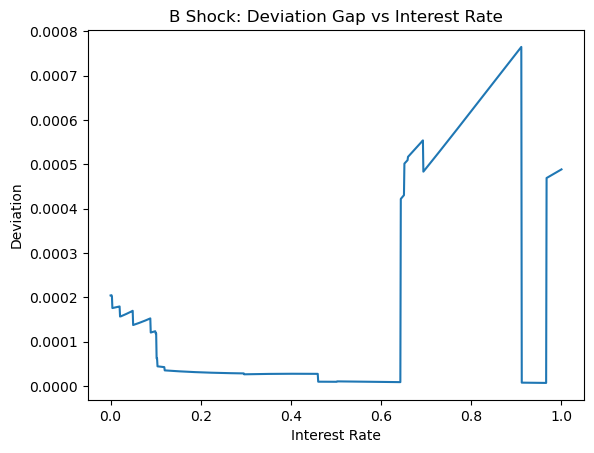

In [84]:
plt.plot(r_arrange, deviation)
plt.title('B Shock: Deviation Gap vs Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Deviation')
plt.show()

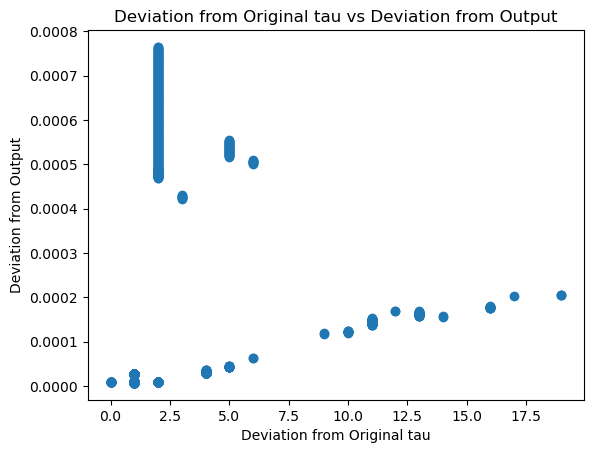

In [85]:
plt.scatter( deviation_second, deviation)
plt.title('Deviation from Original tau vs Deviation from Output')
plt.xlabel('Deviation from Original tau')
plt.ylabel('Deviation from Output')
plt.show()


In [86]:
arg_dev = np.where(deviation == np.min(deviation))[0]
r_arrange[arg_dev]
deviation[arg_dev]

array([[6.82852796e-06]])

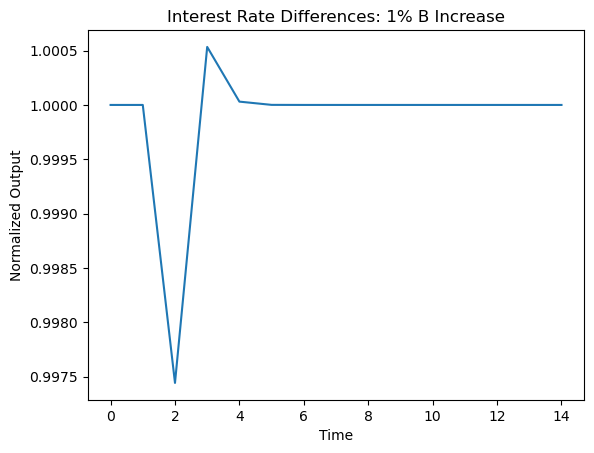

In [87]:
plt.plot(1/P[:, arg_dev]* P[0,arg_dev])
plt.title('Interest Rate Differences: 1% B Increase')
plt.xlabel('Time')
plt.ylabel('Normalized Output')
plt.show()

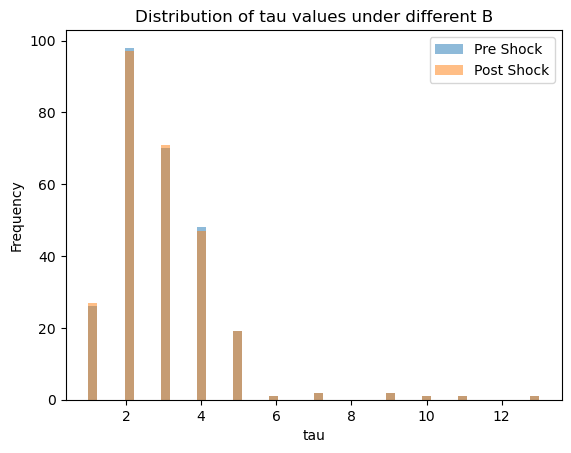

In [88]:
plt.hist(tau1, bins=50, alpha = 0.5)
plt.hist(tau_history[arg_dev[0]], bins=50, alpha = 0.5)
plt.title('Distribution of tau values under different B')   
plt.xlabel('tau')
plt.ylabel('Frequency') 
plt.legend(['Pre Shock', 'Post Shock'])
plt.show()